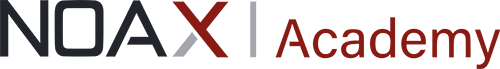

# La regresión ridge (o cómo evitar el overfitting)
#### **Álvaro Méndez Civieta** 

Este cuaderno complementa al artículo del blog de NOAX Academy. ¡Léelo ahora!

¡Hola amig@os de NOAX!

Hoy quiero hablaros de la **regresión penalizada ridge**. Los modelos de regresión penalizada son una alternativa a los modelos de regresión muy utilizada cuando el número de variables en el modelo es muy alto, o las variables están muy correlacionadas entre ellas. Aquí veremos:
* Qué es el sesgo y qué es el overfitting de un modelo;
* Qué es esto de los modelos ridge;
* Su formulación matemática;
* Un ejemplo con python.

Recordad que en [la entrada anterior del blog](https://blog.noaxacademy.com/el-abc-del-machine-learning-regresion-lineal-con-python/) ya introdujimos los  modelos de regresión, ¡si no la habéis leído os la recomiendo! Para entender bien qué es la regresión ridge tenemos que hablar antes de dos aspectos clave de los modelos de machine learning: la **varianza** (y el riesgo de overfitting), y el **sesgo**.

## Qué es el overfitting

Empecemos hablando de uno de los problemas más comunes en machine learning: el **riesgo de sobre-ajustar**, o en inglés, de hacer overfitting. Cuando construimos un modelo, tenemos que tener en cuenta dos factores: por un lado, queremos que las predicciones que nos de el modelo sean lo más precisas posible, es decir, que **el modelo tenga el menor error posible**. Sin embargo, por otro lado sabemos que **las observaciones de nuestro conjunto de datos seguramente tengan errores**: o bien errores de medida, o bien o estén influenciadas por algún aspecto que no tenemos en cuenta en el modelo. Encontramos estos errores por ejemplo:
* En un conjuntos de datos con información biomédica, las máquinas usadas para tomar las mediciones introducen errores.
* En un conjunto de datos con información sobre el precio de venta de las casas, este precio puede verse influido por variables que no aparezcan en el conjunto de datos.

Así que con nuestro modelo queremos conseguir un compromiso, **queremos que sea capaz de captar la tendencia general de los datos, sin dejarse influir por los errores especificos** del conjunto con el que lo entrenamos. Con un ejemplo se entiende todo mejor,

![Relación lineal vs relación no lineal](http://blog.noaxacademy.com/wp-content/uploads/2021/12/ejemplo_overfitting.svg)


**Figura 1 |** A la izquierda, modelo infra ajustado, en el centro, modelo sobre ajustado, a la derecha modelo bien ajustado.

Imaginaos que tenemos el conjunto de datos que sigue la tendencia curva de la imagen superior y queremos construir un modelo para hacer predicciones. 

* Si nuestro modelo es muy general, estaremos en la situación de la imagen izquierda, haciendo underfitting, y no estaremos captando realmente el comportamiento de los datos.

* Pero si nuestro modelo es demasiado poco general, estaremos en la situación de la imagen central, haciendo overfitting, y estaremos incluyendo en el modelo los errores de las observaciones. Es decir, un cambio en nuestro conjunto de datos producirá un cambio muy grande en el modelo.

* Está claro que el mejor modelo es el de la imagen de la derecha, porque capta el comportamiento general (esa tendencia curva) sin dejarse influir por todos los errores específicos de las observaciones.

Ahora bien, la varianza en un modelo nos dice cómo de variable es el modelo. Cuanta mayor es la varianza, más cambios bruscos, subidas y bajadas veremos en las predicciones del modelo. Si la varianza es muy pequeña, el modelo es muy estable y está infra ajustado. Pero si es muy grande, el modelo es demasiado variable y está sobre ajustado. Buscamos un punto medio entre las dos.

## Qué es el sesgo

Vale, ya sabemos lo que es el overfitting y la varianza de un modelo, veamos ahora qué es el sesgo. El sesgo mide la distancia que hay entre el valor esperado de nuestro modelo y el verdadero valor,

$$\text{sesgo}(\hat\beta)=\mathbb{E}(\hat\beta)-\beta$$

Pero de nuevo, esto se entiende mucho mejor con una imagen,

<div>
<img src="http://blog.noaxacademy.com/wp-content/uploads/2021/12/variance_bias_noax.png" width="500"/>
</div>

**Figura 2 |** Comparativa de modelos con varianza grande vs pequeña y modelos con sesgo vs insesgados.

Imagina una diana, e imagina que la solución verdadera $\beta$ es el centro de la diana. Cuando construimos un modelo, obtenemos una estimación $\hat\beta$, y podemos pensar en esa estimación como lanzar un dardo contra esa diana. Si nuestro modelo no tiene sesgo (es insesgado), los dardos que tiremos caerán alrededor del centro de la diana (parte superior de la imagen). Pero si el modelo que construímos tiene un sesgo, los dardos  no caerán alrededor del centro de la diana, sino alrededor de otro sitio (parte inferior de la imagen). Así que está claro que **es preferible que nuestro modelo sea insesgado** para que nuestra estimación esté alrededor del verdadero valor.


## El mejor estimador insesgado..

Pues bien, veamos cómo se relaciona todo esto con la regresión lineal. La ecuación del modelo de regresión es,

$$y = X\beta + \varepsilon$$

Donde $y$ es el vector de la variable respuesta (la que queremos predecir), $X$ es la matrz con las variables predictoras (que usaremos para hacer las predicciones) y $\beta$ es el vector con los parámetros del modelo de regresión (los valores de la ecuación de la recta). Recordemos que para encontrar la solución óptima del modelo de regresión resolvíamos la ecuación,

$$
J(\beta)=\text{min}\left\{\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2\right\}
$$

Si no recuerdas de donde viene esta fórmula no te preocupes, puedes leerlo [en el post anterior](https://blog.noaxacademy.com/el-abc-del-machine-learning-regresion-lineal-con-python/). No quiero entrar en muchos detalles técnicos, pero es importante saber que matemáticamente, la solución del modelo de regresión lineal es el **mejor estimador lineal insesgado**, es decir, es el que tiene la menor varianza de entre todos los posibles tipos de modelos lineales insesgados. Esto en principio es bueno... ¿o no?

Aquí entra en juego el equilibrio entre el sesgo y la varianza, lo que en inglés se llama el **variance bias tradeoff**.


## El equilibrio entre sesgo y varianza

Cuando se construye un modelo de machine learning, existe un equilibrio entre su sesgo y su varianza. 
* Si el sesgo disminuye, la varianza aumenta;
* Si la varianza disminuye, el sesgo aumenta.

Y además, también se sabe que el aumentar la complejidad del modelo, es decir, **aumentar el número de variables** aumenta la varianza (y disminuye el sesgo). La siguiente imagen resume todo esto:

<div>
<img src="http://blog.noaxacademy.com/wp-content/uploads/2021/12/variance_bias_tradeoff_noax.png" width="600"/>
</div>


**Figura 3 |** Equilibrio entre sesgo y varianza de un modelo de machine learning.

## La penalización ridge

Y aquí llegamos a **la clave para entender la regresión ridge**: Hemos dicho que el modelo de regresión normal es el mejor estimador insesgado, pero ¿puede ser que consigamos mejores predicciones con un modelo que tenga un poco de sesgo, pero que a cambio reduzca mucho la varianza?

La respuesta, como te puedes imaginar, es si, y eso es precisamente lo que hace la penalización ridge. Matemáticamente, los modelos ridge resuelven la ecuación,

$$
J(\beta)=\text{min}\left\{\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2+\alpha\sum_{j=1}^p\beta_j^2\right\}
$$

Esta ecuación tiene dos partes, la primera parte es la misma que en un modelo de regresión no penalizado, y la segunda parte es la que se conoce como **penalización ridge**. La solución del modelo ridge serán aquellos valores de $\beta$ que minimicen la función $J(\beta)$.

**¿Pero cómo funciona esta penalización?** Date cuenta de que si los valores de $\beta$ fuesen muy grandes, el valor de la penalización ridge sería muy grande, pero lo que queremos es buscar el valor mínimo de $J(\beta)$. Es decir, que con esta penalización estamos "forzando" a que los coeficientes $\beta$ no sean excesivamente grandes. De forma intuitiva, valores pequeños de los coeficientes harán que la varianza sea menor. 

## Optimización del modelo

Fíjate por último en ese $\alpha$ que aparece en la fórmula de la penalización. Eso es lo que se conoce como un hiper parámetro del modelo de regresión, y es un coeficiente que nosotros, como analistas de datos, debemos ajustar. Valores muy grandes de $\alpha$ hacen que la importancia de la penalización sea mayor, y que los coeficientes $\beta$ se hagan más pequeños para conseguir minimizar $J(\beta)$, y valores muy pequeños de $\alpha$ hacen que la penalización no tenga tanta importancia. De hecho, si $\alpha=0$ (este es el valor más pequeño que puede tomar) estaremos resolviendo un modelo no penalizado.

En la práctica, para encontrar el valor óptimo de $\alpha$ suele considerarse una lista de valores posibles, y se resuelve el modelo con todos ellos. Por último se selecciona el $\alpha$ que minimice el error.

## Pasemos a `python`
Veamos cómo resolver un modelo de regresión ridge en Python. Para ello usaremos un conjunto de datos de $442$ pacientes con diabetes. En este conjunto de datos se midieron $10$ variables, la edad, sexo, índice de masa corporal, presión sanguínea, y otras seis mediciones de serum en sangre, así como una variable adicional que mide el progreso de la enfermedad en los pacientes. Nuestro objetivo es usar las $10$ variables predictoras para construir un modelo que prediga el progreso de la enfermedad.

En primer lugar cargamos las librerías de python que utilizaremos en esta sección:

In [6]:
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Ahora cargamos los datos usando la función `load_diabetes()`, y los escalamos para que tengan media $0$ y desviación típica $1$.

In [9]:
diabetes = load_diabetes()
x = diabetes.data
y = diabetes.target

# Split into train / test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=100, random_state=42)

# Scale
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Construimos en primer lugar un modelo de regresión no penalizado usando la parte de entrenamiento (train) de nuestros datos, y después evaluamos el modelo calculando su error cuadrático medio en la parte de test.

In [10]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

lm_prediction = linear_model.predict(x_test)
lm_error = mean_squared_error(y_test, lm_prediction)

Ahora vamos a construir los modelos de regresión ridge. Para eso definimos un vector de posibles valores para $\alpha$. Lo habitual con estos parámetros es definirlos usando escala logarítmica. En este ejemplo consideramos 500 posibles valores entre $10^{-10}$ y $10^2$. Para cada posible valor de $\alpha$, entrenamos el modelo en la parte de train, y lo testeamos en la parte de test.

In [11]:
alpha = 10**np.linspace(-10, 2, 500)
error_array = np.zeros(len(alpha))

for idx, a in enumerate(alpha):
  ridge_regression = Ridge(alpha=a)
  ridge_regression.fit(x_train, y_train)
  prediction = ridge_regression.predict(x_test)
  error_array[idx] = mean_squared_error(y_test, prediction)

In [19]:
# Optimal alpha
smallest_error = np.min(error_array)
optimal_alpha = alpha[np.argmin(error_array)]

print(f'El valor óptimo de alpha es: {np.round(optimal_alpha, 2)}, con el que se obtiene un error de {np.round(smallest_error, 2)}')

El valor óptimo de alpha es: 26.48, con el que se obtiene un error de 2684.2


Por último vamos a representar los errores que hemos obtenido con los distintos modelos. En el eje vertical representamos el error, y en el eje horizontal representamos el hiper parámetro $\alpha$. La línea verde es el error que tenemos usando el modelo de regresión no penalizado, y la línea azul es el error de los modelos ridge en función del valor de $\alpha$. Como podemos ver, usando un modelo de regresión ridge conseguimos un error de predicción menor que con un modelo no penalizado para valores de $\alpha$ menores de 80 (aproximadamente), y el valor óptimo de $\alpha$ con el que se obtiene el menor error es 26.48.



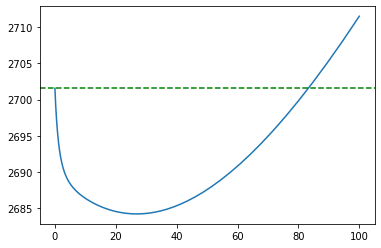

In [14]:
import matplotlib.pyplot as plt

plt.plot(alpha, error_array)
plt.axhline(y=lm_error, color='g', linestyle='--')

Aquí termina nuestra introducción los modelos de regresión ridge, pero si quereis ver qué es la regresión lasso, las diferencias entre ridge y lasso y mucho más... ¡estad atentos a los siguientes posts!

## Acerca del autor
###**Álvaro Méndez Civieta**
Álvaro Méndez obtuvo el título en matemáticas en 2015 por la Universidad de Oviedo, y el master en Big Data Analytics por la Universidad Carlos III en 2016. Después de un año trabajando en la consultora Accenture se unió al programa de doctorado de ingeniería matemática de la Universidad Carlos III, donde continúa trabajando en el desarrollo de modelos de selección de variables en espacios de alta dimensión, con aplicaciones al campo de la genética.
